In [42]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [44]:
# Create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [45]:
# Reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [47]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [48]:
# Save references to each table
measurement = base.classes.measurement 
station = base.classes.station 

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [50]:
# Find the most recent date in the data set.
closest_date = session.query(func.max(measurement.date)).first()
closest_date

('2017-08-23',)

<Axes: xlabel='Date', ylabel='Inches'>

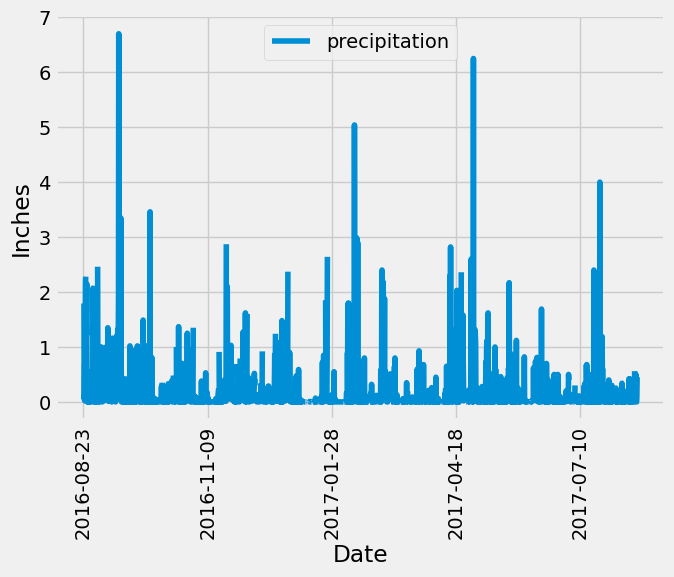

In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results 
# Starting from the most recent data point in the database 

# Calculate the date one year from the last date in data set
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= first_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(one_year, columns=['date','precipitation'])
precipitation_df.set_index('date',  inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(rot=90, xlabel = 'Date', ylabel='Inches', figsize=(7,5))

In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).first()
total_stations

(9,)

In [69]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
total_stations = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).\
                    order_by(func.count(measurement.station).desc()).all()
total_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').first()

Text(0.5, 0, 'Temperature')

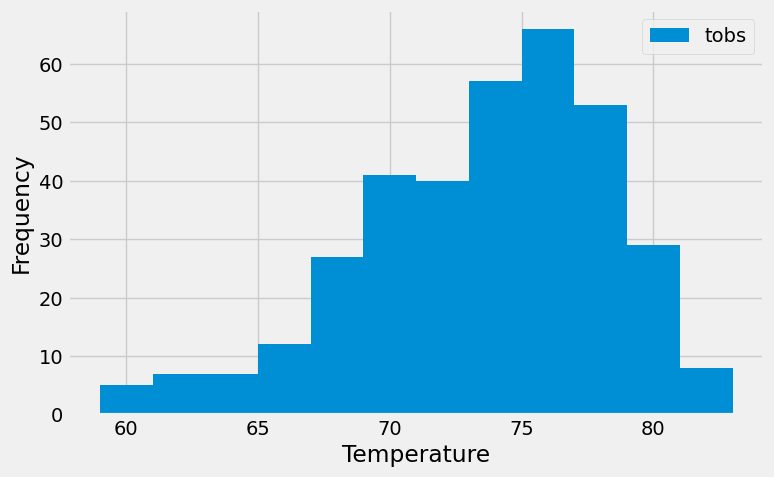

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(measurement.tobs).\
        filter(measurement.station == 'USC00519281').\
        filter(measurement.date >= first_date).all()
station_df = pd.DataFrame(data, columns=['tobs'])

station_df.plot.hist(bins=12, figsize=(8, 5))
plt.xlabel('Temperature')

# Close Session

In [41]:
# Close Session
session.close()